### Learning Rates and Learning Rate Scheduler
https://lightning.ai/courses/deep-learning-fundamentals/unit-6-overview-essential-deep-learning-tips-tricks/unit-6.2-learning-rates-and-learning-rate-schedulers/

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import lightning
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.tuner import Tuner
from common_def import CustomDataModule, CustomDataset, LightningModel, PyTorchMLP

#### Find a good Learning Rate

In [9]:
torch.manual_seed(1)

dm = CustomDataModule()
dm.setup()

torch_model = PyTorchMLP(num_features=100, num_classes=2)
lightning_model = LightningModel(torch_model=torch_model, num_classes=2, learning_rate=0.01)

trainer = lightning.Trainer(
    max_epochs=20, 
    accelerator='cpu', 
    logger=CSVLogger('lightning_logs', name='lr-tunning'),
    deterministic=True)

tunner = Tuner(trainer)

lr_finder = tunner.lr_find(model=lightning_model, datamodule=dm)
print(lr_finder)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.3311311214825908
Restoring states from the checkpoint path at /media/tu/data/dev/python/deeplearning-fundamental-course/.lr_find_4263777b-98a6-497b-8399-95cc30b103da.ckpt
Restored all states from the checkpoint at /media/tu/data/dev/python/deeplearning-fundamental-course/.lr_find_4263777b-98a6-497b-8399-95cc30b103da.ckpt


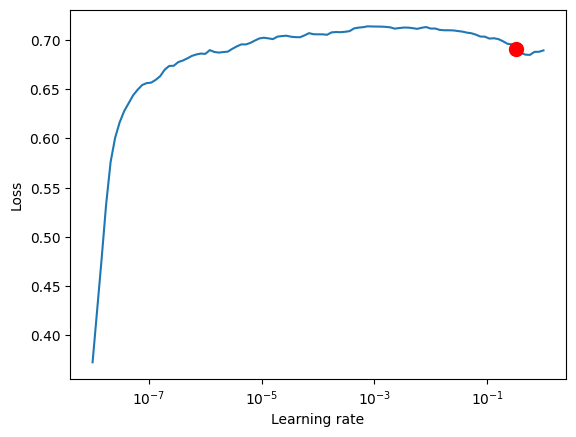

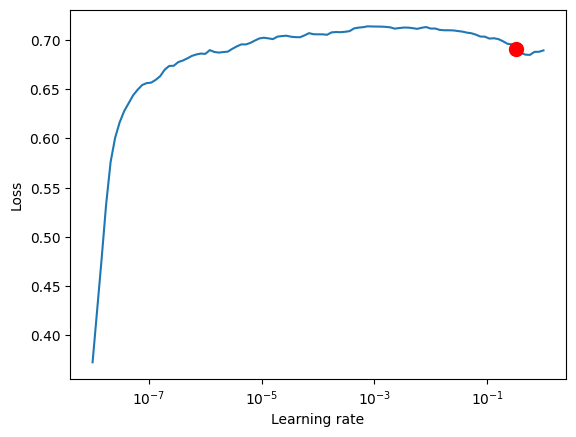

In [11]:
lr_finder.plot(suggest=True)

In [12]:
print(f'best learning rate: {lr_finder.suggestion()}')

best learning rate: 0.3311311214825908
